# Import preamble

In [31]:
%pylab inline

import xarray as xr
import netCDF4 as nc

# rcParams changes matplotlib default values - this is useful for a constant style throughout the notebook
rcParams['savefig.dpi'] = 150
rcParams['figure.figsize'] = [14, 7]

Populating the interactive namespace from numpy and matplotlib


In [41]:
u10 = xr.open_dataset('u_10_coreV2_daymean_1948_2008_ABbox.nc')
v10 = xr.open_dataset('v_10_coreV2_daymean_1948_2008_ABbox.nc')

In [42]:
# here I mean the data in the lon (u) direction, as I am only working with the u component, usually you would have to
# take the mean in both lon and lat dimensions
u10_2d = u10.mean(dim='LON')
u10_2d

<xarray.Dataset>
Dimensions:    (LAT: 1, TIME: 22265, bnds: 2)
Coordinates:
  * LAT        (LAT) float64 -35.24
  * TIME       (TIME) datetime64[ns] 1948-01-01T12:00:00 1948-01-02T12:00:00 ...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) float64 ...
    U_10_MOD   (TIME, LAT) float32 -6.75512 -5.33317 -0.236741 -6.40762 ...

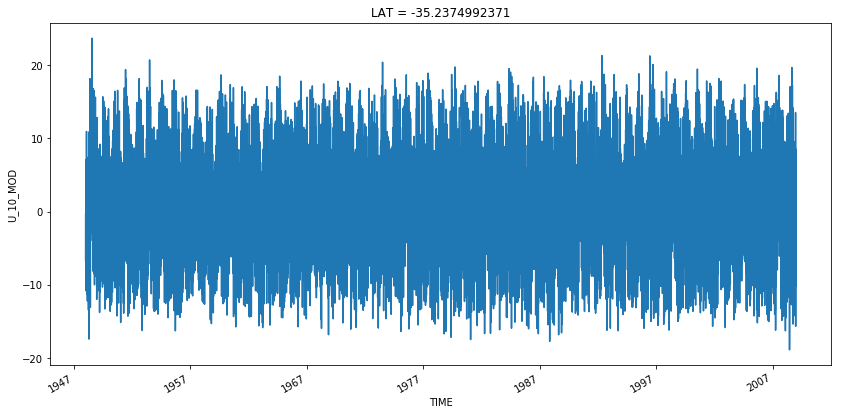

In [43]:
u10_2d.U_10_MOD.plot()

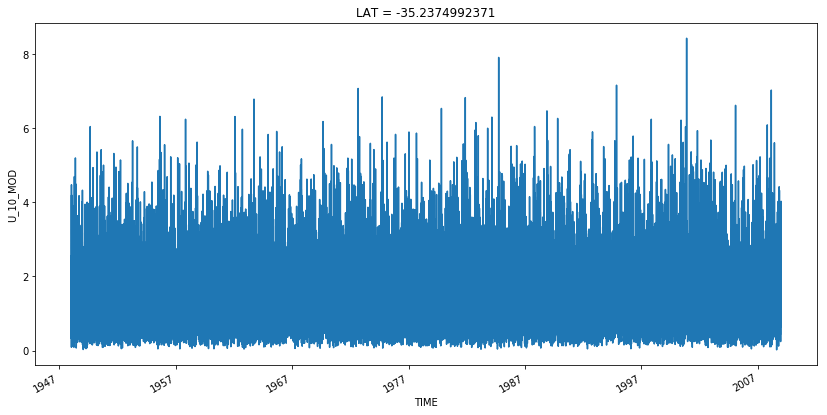

In [46]:
u10_std = u10.std(dim='LON')
u10_std.U_10_MOD.plot()

take a 30 day rolling average

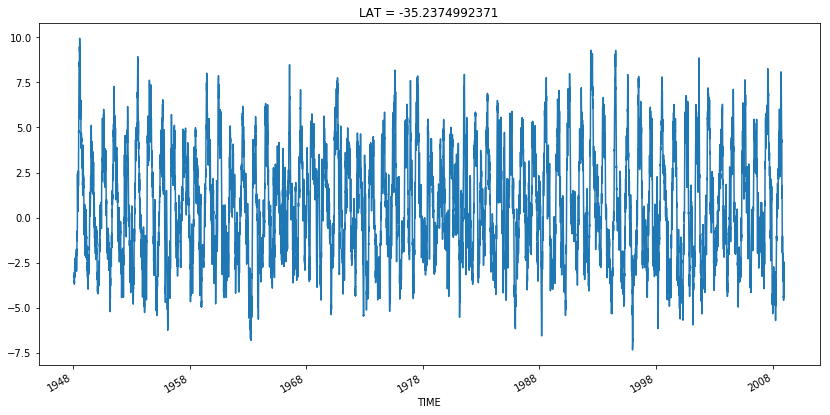

In [58]:
u10_filt = u10_2d.U_10_MOD.rolling(TIME=30).mean()
u10_filt.plot() 

Now resample to get the max value each week

In [79]:
u10_week_max = u10_2d.U_10_MOD.resample(TIME='AS').max()

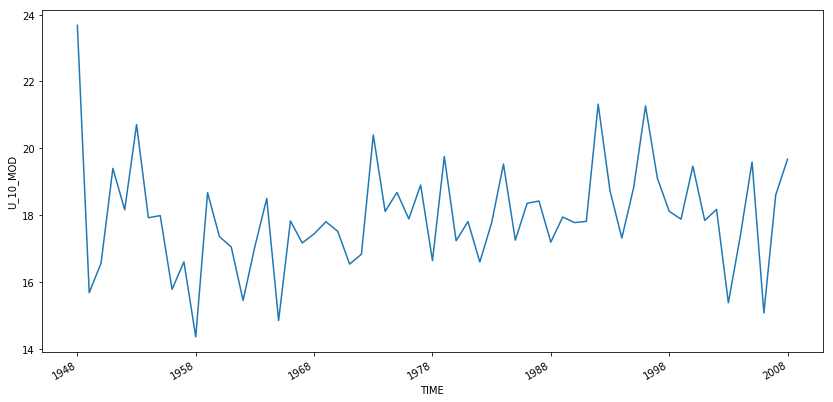

In [80]:
u10_week_max.plot()